# Digital Signal Processing - 9

| ** Title ** | Digital signal processing |
| --- | --- |
| ** Authors ** | Vladimir Fadeev, Zlata Fadeeva |
| ** Contact ** | vladimir_fadeev1993@mail.ru |
| ** Project lang ** | Python |
| ** Packages ** | numpy, scipy, matplotlib |
| ** License ** | GNU GPL 3.0 |


## Introduction

Here is a tutorial on the basics of ** digital signal processing ** using the Python programming language. It is assumed that the reader has basic knowledge of higher mathematics, as well as knows the Python language and at least superficially knows various python libraries - numpy / scipy, matplotlib and others.

For MATLAB / GNU Octave users, mastering the material from the point of view of the program code will not be difficult, since the main functions and their attributes are largely identical and similar to methods from python libraries.

## Nonparametric Spectral Analysis Methods

Researchers often face the question of analyzing the characteristics of a signal, process, or phenomenon.

One of the tools for determining such characteristics is ** spectral analysis **.

Spectral analysis methods can be divided into two large groups:

1. parametric methods;
2. nonparametric methods.

To apply parametric methods, a priori knowledge of the parameters of the object under study is required; in the case of nonparametric methods, it is not required. It is about the latter that will be discussed in this seminar.

> ** Assumption **: We will consider wide-sense stationary (WSS) random processes.

The power spectrum for a random process $ x(n) $ in a broad sense (where $ n $ is the number of the time sample) is nothing more than the Fourier transform of the autocorrelation function of this process [1, 393]:

$$ P_x (e ^ {j \omega}) = \sum _ {- \infty} ^ {\infty} r_x (k) e ^ {jk \omega} \qquad (1) $$

where $ \omega $ is the cyclic frequency and $ k $ is the frequency reference number (frequency index).

On a finite interval, the autocorrelation function will take the form:

$$ \hat {r} (k) = \frac {1} {N} \sum_ {n = 0} ^ {N-1} x (n + k) x ^ * (n) \qquad (2) $$ 

where $ N $ is the length of the sequence of time samples.

## Periodogram method

One of the simplest and most popular representatives of the group of nonparametric methods is the [periodogram method] (https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B8%D0%BE%D0%B4%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0), proposed by Arthur Schuster at the end of the 19th century. Let's consider the mathematical description of this method.

To begin with, as a constraint, we set a condition that does not allow our signal $ x(n) $ to go beyond the interval: 

$$ x_N(n) =
 \begin{cases}
   x(n), &0 \leq n \leq N \\
   0, &\text{otherwise}
 \end{cases}
 \qquad (3)
 $$

Therefore, $ x_N (n) $ is the result of multiplying the signal with a rectangular window function:
$$ x_N(n) = \omega_R(n)x(n) \qquad(4)$$

Taking into account formula (3), we redefine formula (2) through convolution:
$$ \hat{r}(k) = \frac{1}{N}x_N(k)*x_N(-k) \qquad(5)$$

Then the Fourier transform of the autocorrelation function will give the following result:
$$ \hat {P} _ {Per} (e ^ {j \omega}) = \frac {1} {N} X_N (e ^ {j \omega}) X_N ^ * (e ^ {j \omega} ) = \frac {1} {N} \left | X_N (e ^ {j \omega}) \right | ^ 2 \qquad (6) $$

Consequently, the periodogram is proportional to the square of the amplitude to the discrete-time Fourier transform (DTFT), which means it can be calculated using the FFT algorithm at the stage of software implementation.

> In python, the periodogram method is implemented within the ** scipy.signals ** library as the method [** periodogram **] (https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.periodogram.html).  

Let's return to formula (4). It has been noted that the periodogram is proportional to the result of multiplying the signal with the window function $ \omega (n) $, provided that this function is rectangular. However, it should be noted that the window function can be of other forms.

> In the ** periodogram ** method of the ** scipy ** library, the window shape is determined by the * window * parameter (a complete list of available forms can be viewed at [this link] (https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.get_window.html#scipy.signal.get_window)).

A periodogram using a non-rectangular window is often called ** modified **:

$$ \hat {P} _ {M} (e ^ {j \omega}) = \frac {1} {NU} \left | \sum_ {n = - \infty} ^ {\infty} x (n) \omega (n) e ^ {- jn \omega} \right | ^ 2 \qquad (7) $$

where $ N $ is the window length, and $ U $ is a constant [1, p. 410]: $$ U = \frac {1} {N} \sum_ {n = 0} ^ {N-1} | \ omega (n) | ^ 2 \qquad (8) $$

which shows the * unbiased * asymptotic unbiasedness of the modified periodogram.

## Bartlett and Welch methods

Consider more consistent estimates of power spectra. The prerequisite is the observation that as the length of the sequence $ N $ increases to infinity, the mathematical expectation of the periodogram tends to $ P_x (e ^ {j \omega}) $:

$$ \lim_ {N \to \infty} E \{\hat {P} _ {Per} (e ^ {j \omega}) \} = P_x (e ^ {j \omega}) \qquad (9) $$

Accordingly, if we find a consistent estimate of mat. expectations $ E \{\hat {P} _ {Per} (e ^ {j \omega}) \} $, then the estimate $ P_x (e ^ {j \omega}) $ will also be consistent. For this, one can apply the classical averaging over a certain selection of realizations.

Of course, in real systems, a more realistic case is when, instead of collecting a sufficient number of process implementations, we examine a signal of sufficient length, which is split into sequences (* sequences *), and those, in turn, are used for averaging (Fig. 1) ...

![](https://habrastorage.org/webt/r2/ll/ce/r2llce_bbh-rggup6dvk-losjxu.png)

* Fig. 1. Partitioning $ x (n) $ into non-overlapping sequences [1, p. 413]. *

In the literature, this approach is called the ** Bartlett method ** [2, p. 332]:

$$ \hat {P} _B (e ^ {j \omega}) = \frac {1} {N} \sum_ {i = 0} ^ {K-1} \left | \sum_ {n = 0} ^ {L-1} x (n + iL) e ^ {- jn \omega} \right | ^ 2 \qquad (10) $$

where $ K $ is the number of * non-overlapping * sequences of length $ L $ each, and $ N = KL $. In other words, we have before us the formula for averaging periodograms.

However, this is not all. In 1967 F.D. Welch proposes a method that will later bear his name \[2, c.333 \]\[3 \]. The following differences from Bartlett's method are implied:

1) splitting the signal, including into ** overlapping ** (* overlapping *) sequences;

2) the use of not only rectangular window functions (** modified ** periodograms).

> In python, Welch's method is implemented within the ** scipy.signals ** library as the [**welch**](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html) method.

The use of non-rectangular windows allows you to achieve greater degrees of freedom in overlapping\[4\]. At the same time, using overlapping sequences, we increase the total number of signal fragments. As a consequence, the Welch periodogram will be less oscillating (irregular) than the Bartlett periodogram \[2, p.333 \].

### Relationship between software implementations of methods

The following tendencies can be noted: Welch's method is a common case for Bartlett's methods and modified periodogram, and therefore for the periodogram method itself. It is this observation that formed the basis for the architecture of methods as part of their implementation in Python within the scipy library.

## Simulation

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

As an example, consider a harmonic signal of the following form:

In [2]:
w_1 = 40 # frequency of the 1st component of the signal (Hz)
w_2 = 60 # frequency of the 2nd component of the signal (Hz)

a = 0.5 # magnitude of the 1st component of the signal
b = 1.0 # magnitude of the 2nd component of the signal

Let's set the time interval:

In [3]:
Nsub = 10 # number of subsequences

t = np.array([i for i in range(1,301*Nsub)])/1000 # time samples (s)
fs = 1 / (t[1]-t[0]) # sampling frequency (Hz)

Nfft = int(3e3)

We model the signal:

In [4]:
x = a*np.cos(2*np.pi*w_1*t) + b*np.sin(2*np.pi*w_2*t) # considered signal
f = fs*np.array([i for i in range(int(len(x)))]) / len(x) # frequencies

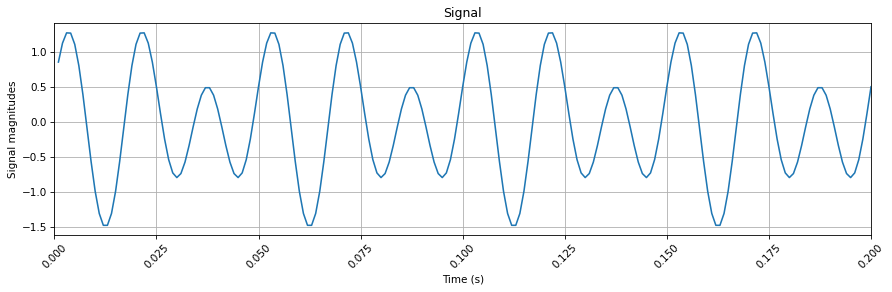

In [5]:
# Plot results
plt.subplots(1, 1, figsize=(12, 4), dpi=75)
plt.plot(t[:200], x[:200])
plt.ylabel('Signal magnitudes')
plt.xlabel('Time (s)')
plt.title('Signal')
plt.xlim([0, 0.2])
plt.grid(True)
plt.tick_params(axis ='x', rotation = 45)
plt.tight_layout()

Let us construct the frequency spectrum of the DFT amplitudes:

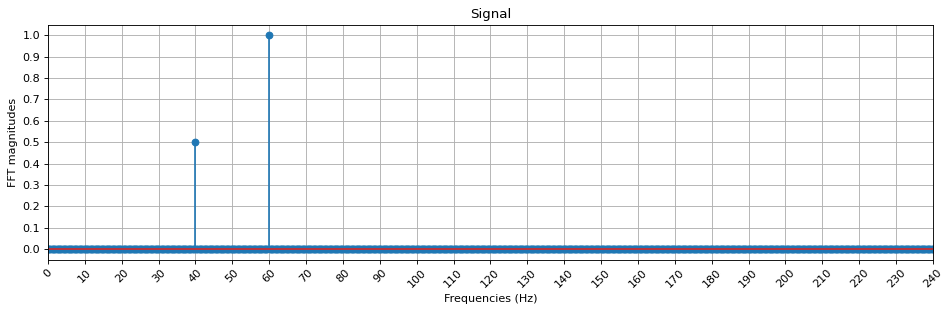

In [6]:
FFT = np.fft.fft(x, n=Nfft) # Fast Fourier Transform 
amps = np.abs(FFT) / (len(FFT) / 2) # magnitudes of FFT

l = int(len(f)/4)

plt.subplots(1, 1, figsize=(12, 4), dpi=80)
plt.stem(f[:l], amps[:l], use_line_collection=True)
plt.ylabel('FFT magnitudes')
plt.xlabel('Frequencies (Hz)')
plt.title('Signal')
plt.grid(True)
plt.xticks(np.arange(0, f[l], 10)) 
plt.yticks(np.arange(0, max(amps)+0.1, .1))
plt.tick_params(axis ='x', rotation = 45)
plt.xlim([0, 240])
plt.tight_layout()

We simulate additive noise:

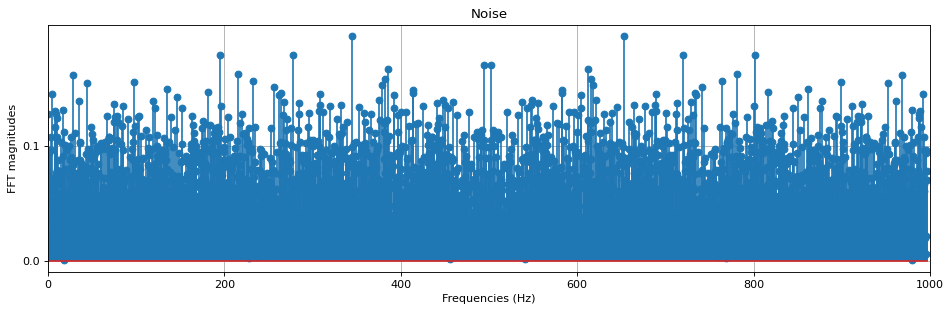

In [7]:
np.random.seed(42)
n = 2*np.random.randn(len(t)) # white Gaussian noise
FFT = np.fft.fft(n, n=Nfft)
amps = np.abs(FFT) / (len(FFT) / 2)

plt.subplots(1, 1, figsize=(12, 4), dpi=80)
plt.stem(f[:len(amps)], amps, use_line_collection=True)
plt.ylabel('FFT magnitudes')
plt.xlabel('Frequencies (Hz)')
plt.title('Noise')
plt.yticks(np.arange(0, max(amps), .1))
plt.xlim([0, 1000])
plt.grid(True)
plt.tight_layout()

Add noise to the original signal:

In [8]:
y = x + n # signal + noise

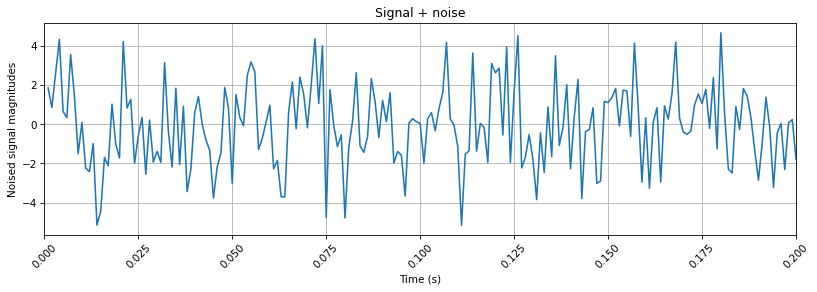

In [9]:
plt.subplots(1, 1, figsize=(11, 4), dpi=75)
plt.plot(t[:200], y[:200])
plt.ylabel('Noised signal magnitudes')
plt.xlabel('Time (s)')
plt.title('Signal + noise')
plt.xlim([0, 0.2])
plt.tick_params(axis ='x', rotation = 45)
plt.grid(True)
plt.tight_layout()

Let's try to analyze this signal using the methods of periodograms and modified periodograms.

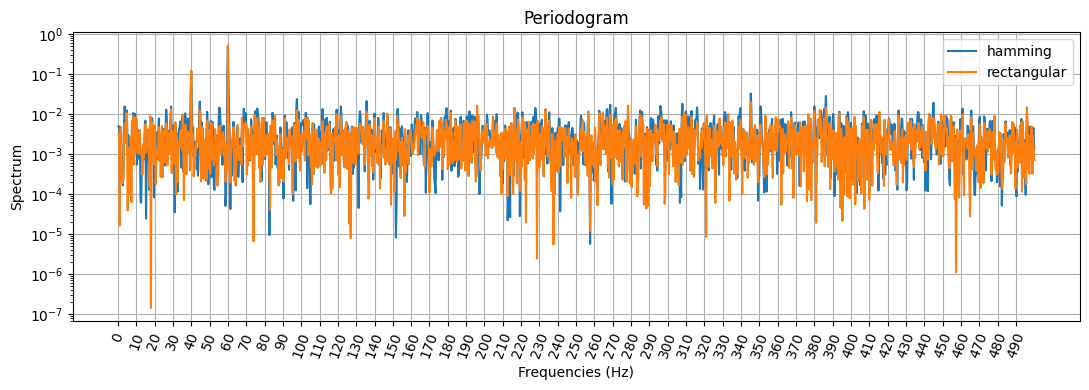

In [10]:
windows = ['hamming', None]
plt.subplots(1, 1, figsize=(11, 4), dpi=100)

for window in windows:
    if window == None:
        label = 'rectangular'
    else:
        label = window
    f, Pxx_den = signal.periodogram(y, fs=fs, scaling='spectrum', nfft=Nfft, window=window)
    plt.semilogy(f[1:], Pxx_den[1:], label=label)

plt.ylabel('Spectrum')
plt.xlabel('Frequencies (Hz)')
plt.title('Periodogram')
plt.xticks(np.arange(0, max(f), 10)) 
plt.tick_params(axis ='x', rotation = 70)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

The two components of the useful signal are, of course, distinguishable, but at high noise amplitudes, the methods may not cope.

Let's try Bartlett's method for the same signal:

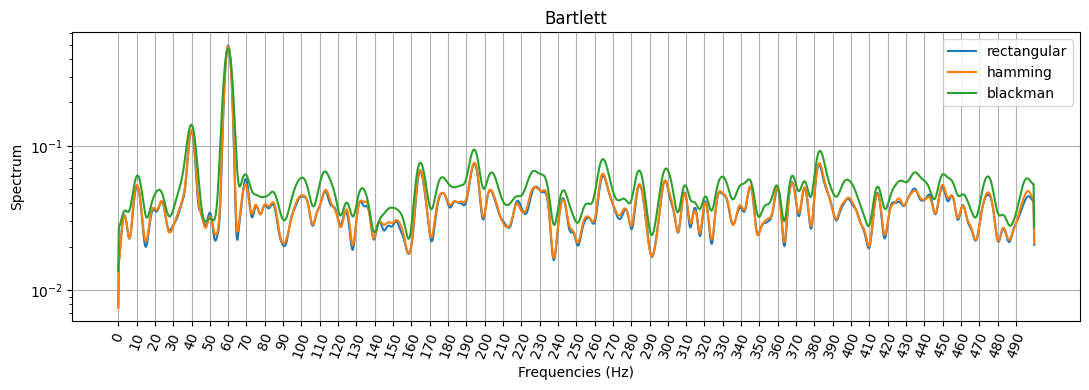

In [11]:
windows = ['bartlett','hamming','blackman']
plt.subplots(1, 1, figsize=(11, 4), dpi=100)

for window in windows:
    if window == 'bartlett':
        label = 'rectangular'
    else:
        label = window
    f, Pxx_den = signal.welch(y, fs=fs, nperseg = len(x)/Nsub, noverlap=0, scaling='spectrum', nfft=Nfft, window=window)
    plt.semilogy(f, Pxx_den, label=label)

plt.legend()
plt.ylabel('Spectrum')
plt.xlabel('Frequencies (Hz)')
plt.title('Bartlett')
plt.xticks(np.arange(0, max(f), 10)) 
plt.tick_params(axis ='x', rotation = 70)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

We note the better discernibility of the useful signal components in the case of splitting into sequences.

## Literature

1. Hayes M. H. Statistical digital signal processing and modeling. - John Wiley & Sons, 2009.
2. Solonina AI Digital signal processing. Simulation in MATLAB. - BHV-Petersburg, 2013.
3. "Digital Signal Processing: The Welch Method" by Prof. Dr.-Ing. Sascha Spors. URL: https://dsp-nbsphinx.readthedocs.io/en/nbsphinx-experiment/spectral_estimation_random_signals/welch_method.html
4. Solomon, Jr, O M. PSD computations using Welch's method. [Power Spectral Density (PSD)]. United States: N. p., 1991. Web. doi: 10.2172/5688766. - p.38.